In [1]:
import pandas as pd
import numpy as np
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import sympy
import pandas as pd

# Load the dataset
df = pd.read_csv("fitness_amp_km_vmax_df.csv")

# Identify input and output variables
# EGvar is our target variable (y)
y = df['EGvar'].values

# Amp_ex is the xij, while P_Km_relative and P_Vmax_relative are the pi's
# We combine these three into our input features (X)
X = df[['Amp_ex', 'P_Km_relative', 'P_Vmax_relative']].values

# It's a good practice to check the shapes of the data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Let's inspect the first few rows to ensure the data is loaded correctly
print("\nFirst 5 rows of the input data (X):")
print(pd.DataFrame(X, columns=['Amp_ex', 'P_Km_relative', 'P_Vmax_relative']).head())
print("\nFirst 5 values of the output data (y):")
print(y[:5])

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Shape of X: (380, 3)
Shape of y: (380,)

First 5 rows of the input data (X):
   Amp_ex  P_Km_relative  P_Vmax_relative
0     0.0       1.444821         0.030568
1     8.0       1.444821         0.030568
2    16.0       1.444821         0.030568
3    32.0       1.444821         0.030568
4    64.0       1.444821         0.030568

First 5 values of the output data (y):
[1.         0.97606123 0.98218214 0.98421859 0.98254964]


In [2]:
# Initialize the PySR model
model = PySRRegressor(
    # Set the number of iterations and populations for a thorough search
    niterations=100,
    populations=30,
    
    # Define the operators available for the model to use
    binary_operators=["+", "*", "/", "-"],
    unary_operators=["exp", "log"],
    
    # To encourage simpler solutions, we increase the complexity penalty
    complexity_of_operators={"exp": 1, "log": 1},
    
    # We set a lower alpha to prevent overfitting while still encouraging simplicity
    alpha=0.05,
)

# Train the model on the entire dataset
# The problem is a single regression problem, not multiple separate ones
model.fit(X, y)

/home/ding_linux/anaconda3/envs/biocircuits/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 3.000e+04
Progress: 166 / 3000 total iterations (5.533%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.565e-02  0.000e+00  y = 0.88753
4           6.200e-03  5.830e-01  y = exp(x₀ * -0.00033981)
6           6.099e-03  8.193e-03  y = exp((x₀ * -0.00072991) / 2.0486)
8           6.087e-03  9.868e-04  y = exp(((x₀ * -0.22888) + x₀) * -0.00047646)
9           5.873e-03  3.588e-02  y = x₂ + ((1.0002 - x₂) + (x₀ * -0.00027556))
10          5.731e-03  2.449e-02  y = exp((x₀ + (x₂ * (x₀ * -0.44597))) * -0.00047646)
12          4.761e-03  9.273e-02  y = exp(-0.00047646 * (x₀ + (x₀ * (-0.44597 * (x₂ / x₁))))...
                                      )
14          4.724e-03  3.848e-03  y = exp(((((x₀ + 15.349) / x₁) * (x₂ * -0.44597)) + x₀) * ...
        

[ Info: Final population:
[ Info: Results saved to:


,model_selection,'best'
,binary_operators,"['+', '*', ...]"
,unary_operators,"['exp', 'log']"
,expression_spec,None
,niterations,100
,populations,30
,population_size,27
,max_evals,None
,maxsize,30
,maxdepth,None
,warmup_maxsize_by,None


  - outputs/20250914_221524_q7qO4Z/hall_of_fame.csv


In [3]:
# 获取 PySR 找到的所有方程（这是一个 Pandas DataFrame）
all_equations = model.equations_

# 根据损失（loss）从低到高排序
sorted_by_loss = all_equations.sort_values(by='loss', ascending=True)
print("按损失排序的前10个方程:")
display(sorted_by_loss.head(10))

# 或者，你也可以根据得分（score）排序，它能更好地平衡复杂度和损失
sorted_by_score = all_equations.sort_values(by='score', ascending=False)
print("按得分排序的前10个方程:")
display(sorted_by_score.head(10))






按损失排序的前10个方程:


,complexity,loss,equation,score,sympy_format,lambda_format
17,27,0.002661,exp((x0 * -0.0007299127) / ((((x1 + 1.1792752)...,0.035844,exp(-0.0007299127*x0/(0.64202017 + (x1 + 1.179...,PySRFunction(X=>exp(-0.0007299127*x0/(0.642020...
16,26,0.002758,exp((x0 + x1) * (-0.0007299127 / ((((x1 * 1.08...,0.001588,exp((x0 + x1)*(-0.0007299127)/((x1 + x1*1.0843...,PySRFunction(X=>exp((x0 + x1)*(-0.0007299127)/...
15,24,0.002767,exp(x0 * (-0.0007299127 / ((((x1 * 1.0843457) ...,0.003096,exp(x0*(-0.0007299127)/((x1 + x1*1.0843457)/ex...,PySRFunction(X=>exp(x0*(-0.0007299127)/((x1 + ...
14,22,0.002784,exp((x0 * -0.0007299127) / (((x1 + x1) / exp(x...,0.025466,exp(x0*(-0.0007299127)/((x1 + x1)/exp(x1 - exp...,PySRFunction(X=>exp(x0*(-0.0007299127)/((x1 + ...
13,21,0.002856,exp((x0 * -0.0008296684) / exp((x1 + 0.3094937...,0.000369,exp(x0*(-0.0008296684)/exp((x1 + 0.30949372)/e...,PySRFunction(X=>exp(x0*(-0.0008296684)/exp((x1...
12,19,0.002858,exp(x0 * (-0.0008296684 / exp((x1 + 0.30949372...,0.067228,exp(x0*(-0.0008296684)/exp((x1 + 0.30949372)/e...,PySRFunction(X=>exp(x0*(-0.0008296684)/exp((x1...
11,17,0.003269,exp((x0 * -0.00072152744) / exp((x2 + x1) / ex...,0.131007,exp(x0*(-0.00072152744)/exp((x1 + x2)/exp(x1 -...,PySRFunction(X=>exp(x0*(-0.00072152744)/exp((x...
10,16,0.003727,exp(-0.0007299127 * (x0 / (((x2 + 1.696068) / ...,0.001151,exp(-0.0007299127*x0/(0.401821009773089 + (x2 ...,PySRFunction(X=>exp(-0.0007299127*x0/(0.401821...
9,15,0.003731,exp((x0 / (((x2 + 1.696068) / (x1 - log(x1))) ...,0.012795,exp(-0.0007299127*x0/(0.42039594 + (x2 + 1.696...,PySRFunction(X=>exp(-0.0007299127*x0/(0.420395...
8,14,0.003779,exp((x0 / exp(((x1 + x2) + x1) / exp(x1))) * -...,0.031422,exp(x0*(-0.00074154185)/exp((x1 + x1 + x2)/exp...,PySRFunction(X=>exp(x0*(-0.00074154185)/exp((x...


按得分排序的前10个方程:


,complexity,loss,equation,score,sympy_format,lambda_format
1,4,0.006086,exp(x0 / -2740.326),0.589218,exp(x0/(-2740.326)),PySRFunction(X=>exp(x0/(-2740.326)))
5,9,0.004492,exp((x0 * (x1 - log(x1))) * -0.00028482798),0.180277,exp(-0.00028482798*x0*(x1 - log(x1))),PySRFunction(X=>exp(-0.00028482798*x0*(x1 - lo...
11,17,0.003269,exp((x0 * -0.00072152744) / exp((x2 + x1) / ex...,0.131007,exp(x0*(-0.00072152744)/exp((x1 + x2)/exp(x1 -...,PySRFunction(X=>exp(x0*(-0.00072152744)/exp((x...
7,12,0.004024,exp((x0 * -0.0014086313) / exp(1.6192759 / (x1...,0.085563,exp(-0.0014086313*x0*exp(-1.6192759/(x1 - log(...,PySRFunction(X=>exp(-0.0014086313*x0*exp(-1.61...
4,8,0.005380,exp((x0 * -0.000863051) / (x2 + 2.0207634)),0.084261,exp(x0*(-0.000863051)/(x2 + 2.0207634)),PySRFunction(X=>exp(x0*(-0.000863051)/(x2 + 2....
12,19,0.002858,exp(x0 * (-0.0008296684 / exp((x1 + 0.30949372...,0.067228,exp(x0*(-0.0008296684)/exp((x1 + 0.30949372)/e...,PySRFunction(X=>exp(x0*(-0.0008296684)/exp((x1...
17,27,0.002661,exp((x0 * -0.0007299127) / ((((x1 + 1.1792752)...,0.035844,exp(-0.0007299127*x0/(0.64202017 + (x1 + 1.179...,PySRFunction(X=>exp(-0.0007299127*x0/(0.642020...
2,5,0.005873,(x0 * -0.00027555908) + 1.0001853,0.035707,1.0001853 + x0*(-0.00027555908),PySRFunction(X=>1.0001853 + x0*(-0.00027555908))
8,14,0.003779,exp((x0 / exp(((x1 + x2) + x1) / exp(x1))) * -...,0.031422,exp(x0*(-0.00074154185)/exp((x1 + x1 + x2)/exp...,PySRFunction(X=>exp(x0*(-0.00074154185)/exp((x...
14,22,0.002784,exp((x0 * -0.0007299127) / (((x1 + x1) / exp(x...,0.025466,exp(x0*(-0.0007299127)/((x1 + x1)/exp(x1 - exp...,PySRFunction(X=>exp(x0*(-0.0007299127)/((x1 + ...


找到的最佳通用方程:
Equation: exp((x0 + x1) * (-0.0007299127 / ((((x1 * 1.0843457) + x1) / exp(x1 - exp((x1 * (x0 * -0.0007299127)) + x2))) + 0.8068403)))
Loss: 0.0028
Score: 0.0016


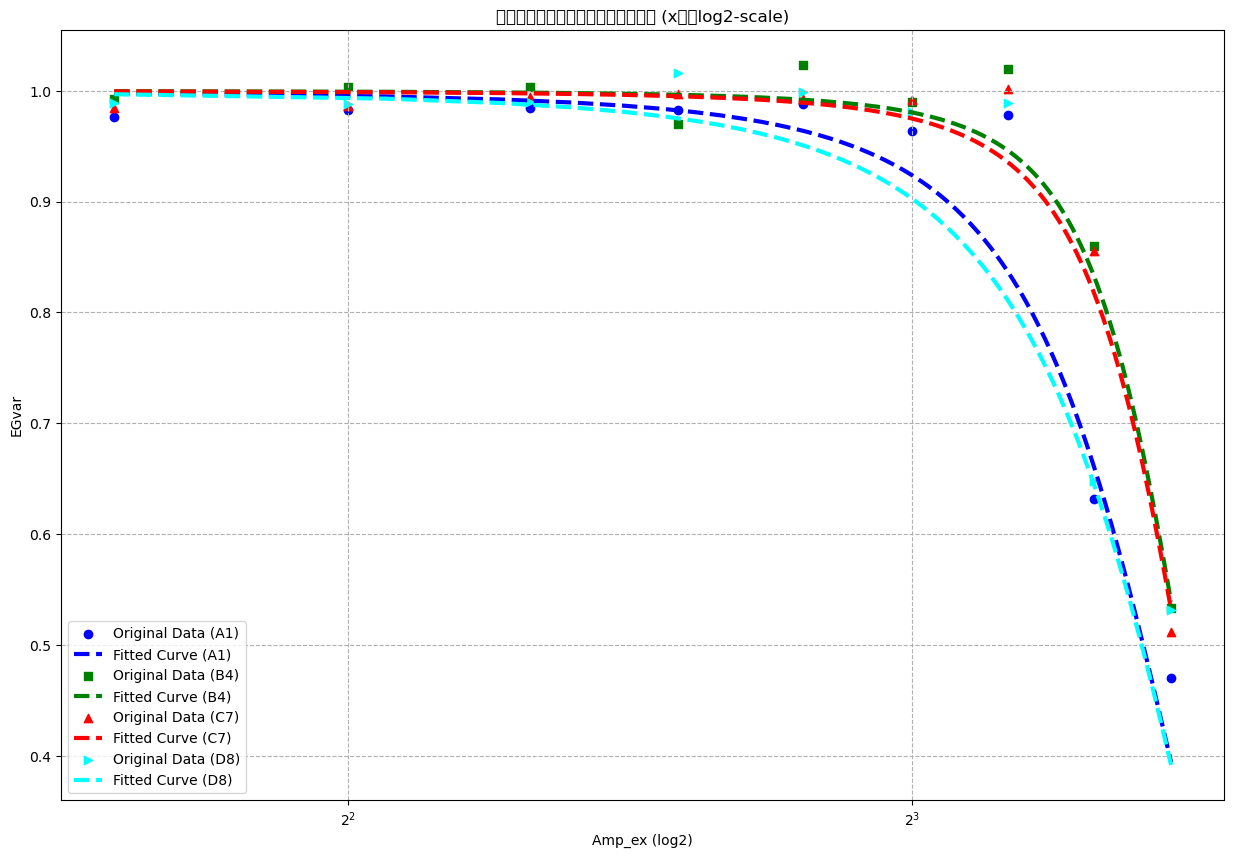

In [13]:
best_equation_info = sorted_by_loss.iloc[1]
best_equation_str = best_equation_info['equation']

print("找到的最佳通用方程:")
print(f"Equation: {best_equation_str}")
print(f"Loss: {best_equation_info['loss']:.4f}")
print(f"Score: {best_equation_info['score']:.4f}")

best_equation = best_equation_info['sympy_format']

# 2. 准备 SymPy 变量和可调用函数
amp_ex, p_km_relative, p_vmax_relative = sympy.symbols('x0 x1 x2')
eval_func = sympy.lambdify(
    [amp_ex, p_km_relative, p_vmax_relative],
    best_equation,
    modules=['numpy']
)

# 3. 选择要可视化的突变体
mutants_to_plot = ['A1', 'B4', 'C7','D8']

# 4. 绘制所有选定突变体的数据和拟合曲线
plt.figure(figsize=(15, 10))
markers = ['o', 's', '^','>']
colors = ['blue', 'green', 'red','cyan']

for i, mutant_id in enumerate(mutants_to_plot):
    mutant_data = df[df['Mutant'] == mutant_id]
    
    p_km_rel = mutant_data['P_Km_relative'].iloc[0]
    p_vmax_rel = mutant_data['P_Vmax_relative'].iloc[0]
    
    x_data = mutant_data['Amp_ex'].values
    y_data = mutant_data['EGvar'].values
    
    # 将 Amp_ex = 0 的点单独处理，因为 log(0) 无定义
    # 我们可以用一个小的值代替它或者直接忽略
    non_zero_x_data = x_data[x_data > 0]
    non_zero_y_data = y_data[x_data > 0]
    
    # 绘制原始数据点
    plt.scatter(
        np.log2(non_zero_x_data),
        non_zero_y_data,
        marker=markers[i],
        color=colors[i],
        label=f'Original Data ({mutant_id})'
    )
    
    # 为拟合曲线生成更密集的 x 值
    x_smooth = np.linspace(non_zero_x_data.min(), non_zero_x_data.max(), 200)
    
    # 使用通用模型和该突变体的参数进行预测
    y_pred_smooth = eval_func(x_smooth, p_km_rel, p_vmax_rel)
    
    # 绘制拟合曲线
    plt.plot(
        np.log2(x_smooth),
        y_pred_smooth,
        color=colors[i],
        lw=3,
        linestyle='--',
        label=f'Fitted Curve ({mutant_id})'
    )

# 设置 x 轴为对数刻度
plt.xscale('log', base=2)

plt.title('通用模型在选定突变体上的拟合效果 (x轴为log2-scale)')
plt.xlabel('Amp_ex (log2)')
plt.ylabel('EGvar')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
